## Calculate Dataset Characteristics
- calculate traditional and topological dataset characteristics for each dataset split out of the `DataPreparation.ipynb`
- display the distribution and correlation of characteristics among all datasets

In [1]:
import numpy as np
from src.config import EVALUATION_DIRECTORY
from utils import load_dataset_characteristics, plot_column_distribution_seaborn, plot_correlation_matrix

### 1. Load / Create Dataset `DatasetCharacteristics.csv`

In [ ]:
filename = EVALUATION_DIRECTORY.joinpath("utils/DatasetCharacteristics.csv")
dataset_characteristics = load_dataset_characteristics(filename)

In [4]:
dataset_characteristics['density'] = 1 - dataset_characteristics['sparsity']

# Loop through columns that start with "average_clustering"
for col in dataset_characteristics.columns:
    if col.startswith('average_clustering') or col.startswith('density'):
        # Calculate log10 and create a new column with "_log" suffix
        dataset_characteristics[f"{col}_log"] = np.log10(dataset_characteristics[col])

### 2. Plot Characteristics Distribution among all Splits

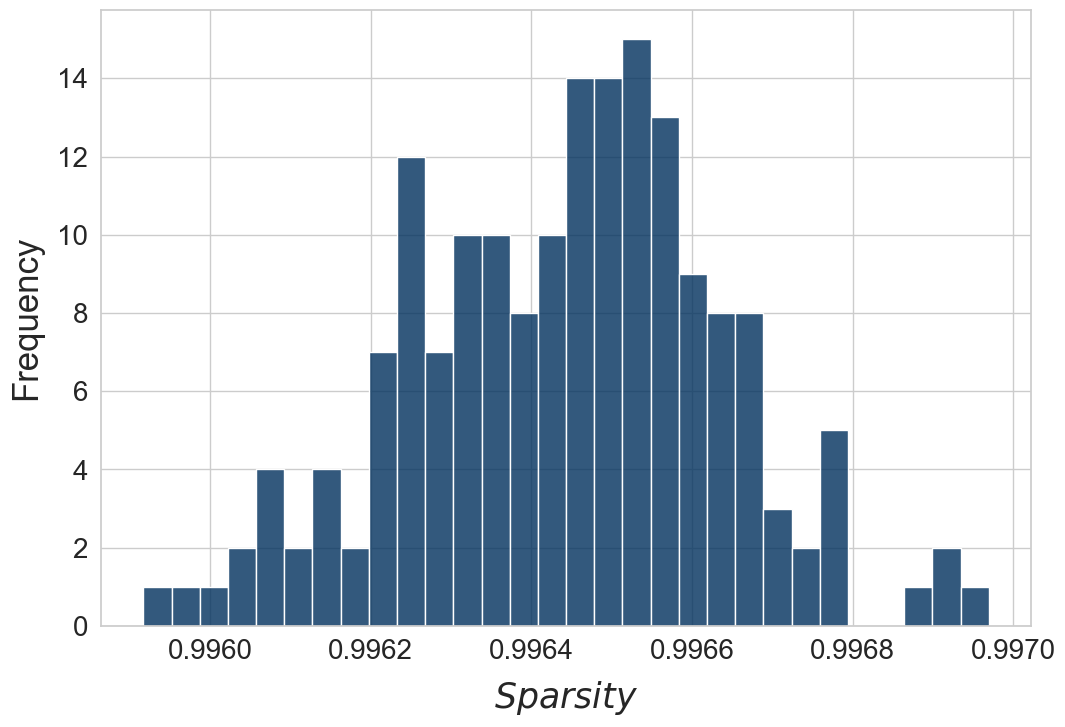

In [5]:
# Example usage: Plot for 'user_num'
plot_dict = [['inter_num','\\# interactions'],
             ['user_num','\\# users'],
             ['item_num','\\# items'],
             ['sparsity','Sparsity'],
             ['shape','Shape'],
             ['space_size','SpaceSize'],
             ['gini_user','Gini_U'],
             ['gini_item','Gini_I'],
             ['average_degree','AvgDeg'],
             ['average_degree_user','AvgDeg_U'],
             ['average_degree_item','AvgDeg_I'],
             ['degree_assort_user','Assort_U'],
             ['degree_assort_item','Assort_I'],
             ['average_clustering_coef_dot','AvgClust'],
             ['average_clustering_coef_dot_user','AvgClust_U'],
             ['average_clustering_coef_dot_item','AvgClust_I']]

plot_dict = [['sparsity','Sparsity']]

for plot in plot_dict:
    plot_column_distribution_seaborn(dataset_characteristics, plot[0], value_name=f"${plot[1]}$", save_fig = True)

### 3. Plot Characteristics Correlation among all Splits
- Calculate the Pearson correlation coefficient to observe how these characteristics typically vary together, which is important for later statistical analysis.

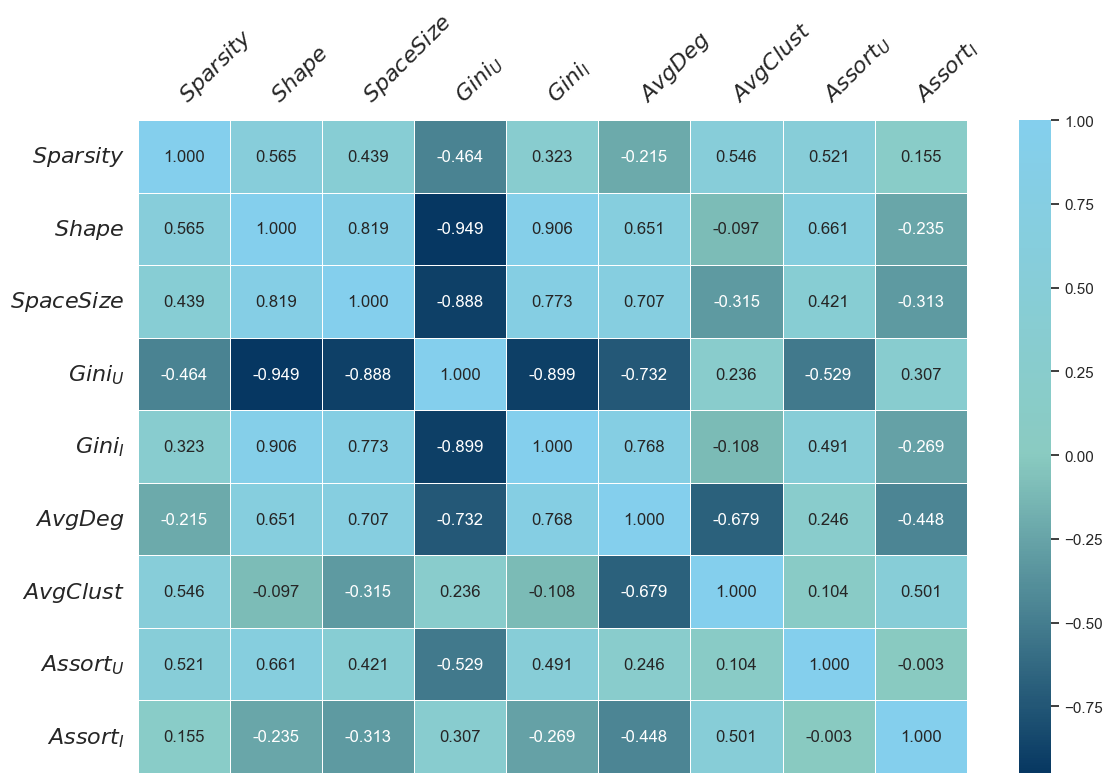

In [6]:
columns = ["sparsity", "shape", "space_size", "gini_user", "gini_item", "average_degree", "average_clustering_coef_dot", "degree_assort_user", "degree_assort_item"]
labels =  ["$Sparsity$", "$Shape$", "$SpaceSize$", "$Gini_U$", "$Gini_I$", "$AvgDeg$", "$AvgClust$", r"$Assort_U$", r"$Assort_I$"]
plot_correlation_matrix(dataset_characteristics, columns, labels, filename = "heatmap_dataset_metrics.png",save_fig=False)

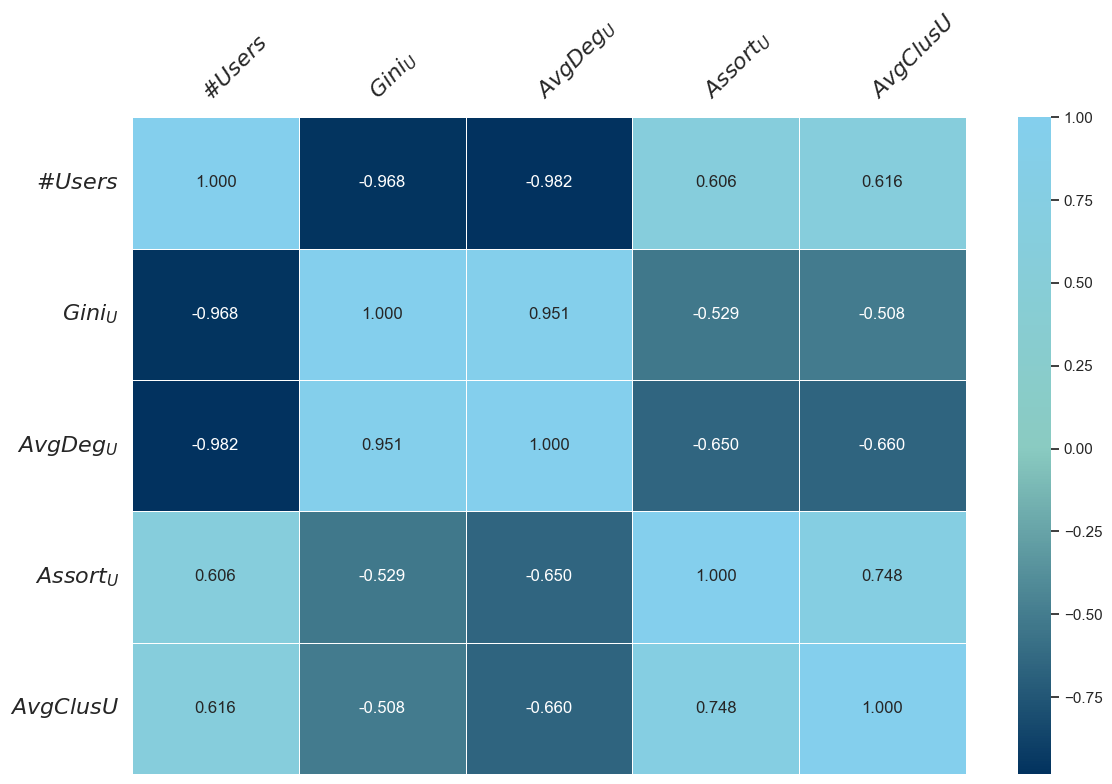

In [7]:
columns = ["user_num", "gini_user", "average_degree_user", "degree_assort_user", "average_clustering_coef_dot_user"]
labels =  ["$\\# Users$", "$Gini_U$", "$AvgDeg_U$", "$Assort_U$", "$AvgClusU$"]
plot_correlation_matrix(dataset_characteristics, columns, labels, filename = "heatmap_dataset_user_metrics_user.png",save_fig=False)

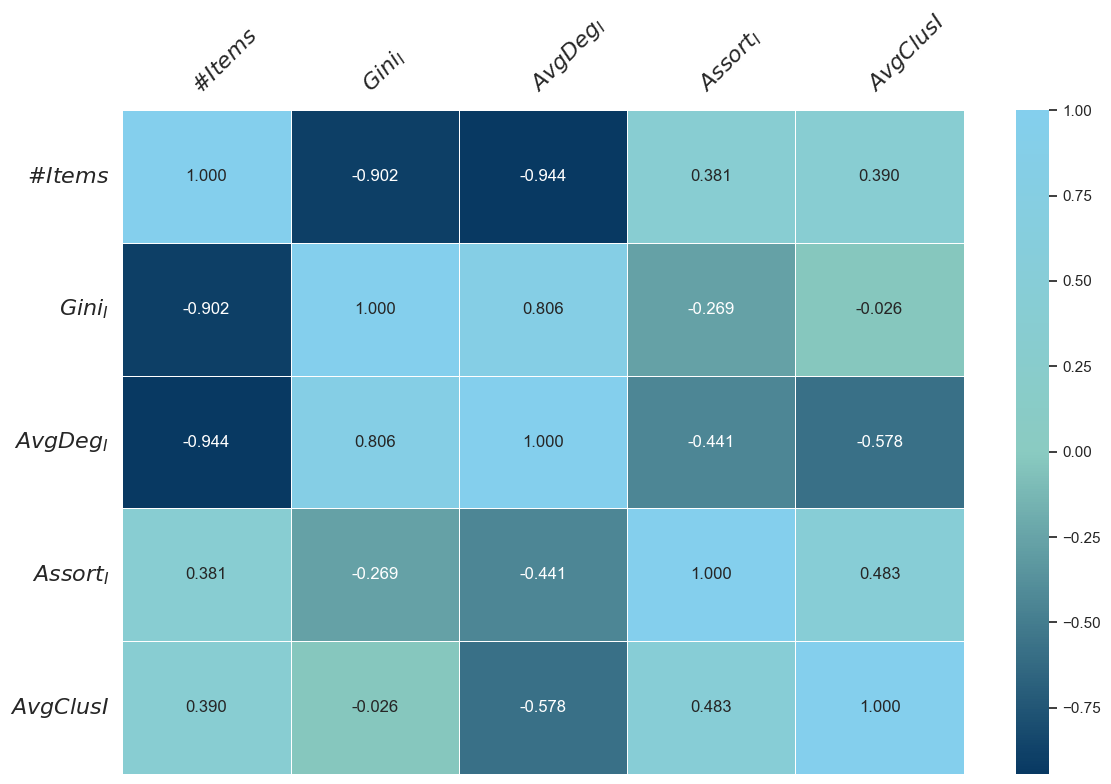

In [8]:
columns = ["item_num", "gini_item", "average_degree_item", "degree_assort_item", "average_clustering_coef_dot_item"]
labels =  ["$\\# Items$", "$Gini_I$", "$AvgDeg_I$", "$Assort_I$", "$AvgClusI$"]
plot_correlation_matrix(dataset_characteristics, columns, labels, filename = "heatmap_dataset_item_metrics_item.png",save_fig=False)